# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

In [88]:
class Tweet:
    def __init__(self) -> None:
        """ Read all tweets from files"""
        self.__file_text = []
        for file_number in range(1, 6):
            with open(f"file{file_number}", "r") as f:
                for post in f.read().split("\n")[:-1]:
                    self.__file_text.append(post)

    def __getitem__(self, item: int) -> str:
        """return tweet by ibdex"""
        return self.__file_text[item]

    def __len__(self):
        return len(self.__file_text)


tweet = Tweet()
for i in range(44, 59):
    print(f"{i - 43}. {tweet[i]}\n\t{tweet[i]}")

1. Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
	Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
2. Its american tradition bitch
	Its american tradition bitch
3. @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
	@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
4. " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
	" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
5. Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
	Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Samm

1. Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
	Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com
2. Its american tradition bitch
	Its , american , tradition , bitch
3. @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
	@ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , 'm , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones
4. " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
	" , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , "" , I , tweet , because , I , 'm , happy , , , I , tweet , because , I , 'm , free , "" , LOL , ! , "
5. Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
	Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , 's , done , it , aga , .. , http://tinyurl.com/lb5p6m
6. @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
	@dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , 's , kinda , cool , when , u , get , up , to , speed , .
7. iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
	iPhone , activation , delays , continue , , , Apple , offers , $ , 3 , 0 , http://twt.gs/l3Ki
8. RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
	RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 2 , 5 , MB , http://bit.ly/62mjw , Nice , !!!
9. RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
	RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , 's , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI
10. Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
	Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)
11. Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
	Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland
12. @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
	@mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , 't , do , both
13. Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
	Incoming , : , Frightened , Rabbit , ,  , Sept , . , 2 , 2 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , .. , http://tinyurl.com/nz6xcv
14. Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
	Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ ,)
15. Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
	Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

Parts of this class was taken from [website](https://www.geeksforgeeks.org/byte-pair-encoding-bpe-in-nlp/)

In [374]:
from typing import List
import re
from collections import defaultdict


class BPETokenizer:

    def __init__(self, vocab_size: int, corpus: List[str]) -> None:
        """This class train BPE by given corpora and tokenize sentence"""
        self.vocab_size = vocab_size
        self.corpus = corpus
        self.vocab = self.__get_vocab()
        self.tokens = None

    def train(self) -> None:
        """Main function for training, start it to receive set of tokens"""

        # iterate n times
        for _ in range(self.vocab_size):
            # count freq of pair
            pairs = self.__get_stats()
            #update vocab
            self.vocab = self.__merge_vocab(max(pairs, key=pairs.get))

        # Transform dict vocab to sorted(the longest token first) list of tokens
        self.tokens = list(set(" ".join(self.vocab).replace("</w>", " ").split()))
        self.tokens = sorted(self.tokens, key=lambda s: len(s), reverse=True)

    def __get_stats(self) -> defaultdict[str]:
        """count frequency of pairs in corpora"""
        pairs = defaultdict(int)

        # iterate over vocab
        for word, freq in self.vocab.items():
            #create list of symbols
            symbols = word.split()
            for i in range(len(symbols) - 1):
                # append and update dict of pairs
                pairs[symbols[i], symbols[i + 1]] += freq

        return pairs

    def __get_vocab(self) -> defaultdict[str]:
        """Create dict of words from input corpora"""
        vocab = defaultdict(int)

        # iterate over all str in list
        for line in self.corpus:
            for word in line.split():
                # append and count words by cgar
                vocab[' '.join(list(word)) + ' </w>'] += 1

        return vocab

    def __merge_vocab(self, pair) -> set:
        """Create new vocab based on previous one with pairing of chosen symbols"""
        v_out = {}

        # regular expression is used to identify pairs and create bigrams
        bigram = re.escape(' '.join(pair))
        p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

        # iterates through the vocab to produce a new vocab based on the pairing
        for word in self.vocab:
            w_out = p.sub(''.join(pair), word)
            v_out[w_out] = self.vocab[word]

        return v_out

    def tokenize(self, text: str) -> List[str]:
        """Get str and return list of tokens from this string"""

        #choose tokens that may be in string
        tokens_of_text = " ".join([i for i in self.tokens if i in text])

        final = []

        substring = ""
        #take every char from input string
        for char in text:
            substring += char
            #if substring not in tokens then on previous iteration we
            #foubd necessary token
            if substring not in tokens_of_text:
                final.append(substring[:-1].strip())
                substring = char
        # case when str is ended
        final.append(substring.strip())

        return final

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

100%|██████████| 25/25 [02:39<00:00,  6.36s/it]


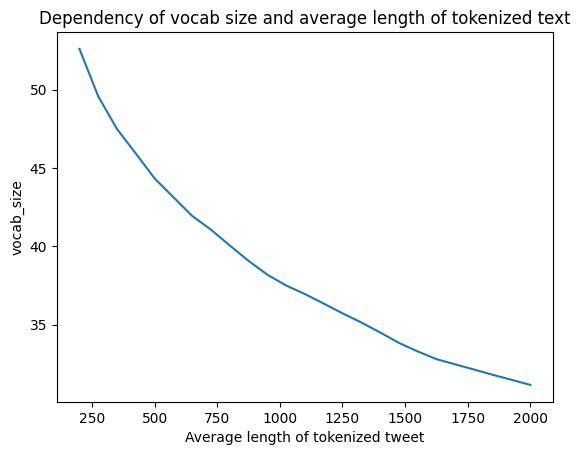

In [413]:
import matplotlib.pyplot as plt
from tqdm import tqdm

av_len_tok = []
vocab_size = [i for i in range(200, 2001, 75)]

for v_size in tqdm(vocab_size):

    tokenizer = BPETokenizer(v_size, tweet[:])
    tokenizer.train()

    sum_len_tok = 0
    for x in tweet:
        sum_len_tok += len(tokenizer.tokenize(x))

    av_len_tok.append(sum_len_tok / len(tweet))

plt.plot(vocab_size, av_len_tok)
plt.xlabel("Average length of tokenized tweet")
plt.ylabel("vocab_size")
plt.title("Dependency of vocab size and average length of tokenized text");

As vocab_size increases, the average number of tokens per tweet will decrease. Since popular combinations are initially combined, which reduces the number of tokens per tweet. But with further increase, unpopular combinations are combined, which does not significantly change the average value.
I think that in this case, the size of about 2500 will be acceptable, since after that rare words such as nicknames or links begin to combine, and greatly increase the execution time.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

Dataset was downloaded from [kaggle source](https://www.kaggle.com/datasets/warcoder/detection-of-arguments-vs-non-arguments-in-spanish) 5.8 MB

In [403]:
import pandas as pd

df = pd.read_excel("SpanishArgumentAnnotatedCorpus.xlsx")
spanish = df.Tweet_Checked.to_list()

In [410]:
spanish = spanish[:220]

In [414]:
av_len_tok = []
vocab_size = [i for i in range(200, 2001, 75)]

for v_size in tqdm(vocab_size):

    tokenizer = BPETokenizer(v_size, spanish)
    tokenizer.train()

    sum_len_tok = 0
    for x in tweet:
        sum_len_tok += len(tokenizer.tokenize(x))

    av_len_tok.append(sum_len_tok / len(tweet))

100%|██████████| 25/25 [02:01<00:00,  4.87s/it]


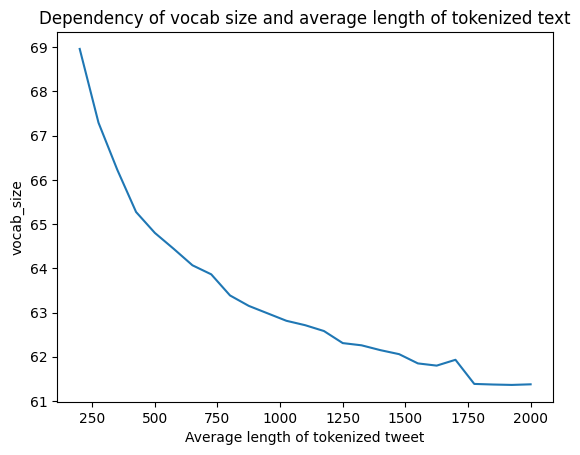

In [415]:
plt.plot(vocab_size, av_len_tok)
plt.xlabel("Average length of tokenized tweet")
plt.ylabel("vocab_size")
plt.title("Dependency of vocab size and average length of tokenized text");

Tweets are also used in this dataset, so the maximum message length is the same as in English. At the same time, I made the size the same. Of the differences, only the language.
The average behaves in the same way as in English. But only the length of the words differs.

Average English is less than Spanish. This is due to the fact that the political theme is raised in the Spanish tweets. Because of this, the total length of tweets will be longer, and the more words, the more tokens.

In [424]:
l_of_eng = 0
for tw in tweet:
    l_of_eng += len(tw)
print(f"Avg. len of English tweet: {l_of_eng / 220}")

l_of_spa = 0
for tw in spanish:
    l_of_spa += len(tw)
print(f"Avg. len of Spanish tweet: {l_of_spa / 220}")

Avg. len of English tweet: 98.68181818181819
Avg. len of Spanish tweet: 200.7590909090909
